In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pydotplus
from IPython.display import Image 

Załadowanie danych

In [ ]:
data=pd.read_csv('DecisionTree_simpledata.csv')
data

,Wiek,Typ,Ryzyko
0,23,family,high
1,17,sport,high
2,43,sport,high
3,68,family,low
4,32,truck,low
5,20,family,high


Dane z tabeli (bez atrybutu **Ryzyko**) zapisujemy w kodowaniu **one-hot**

In [ ]:
one_hot_data = pd.get_dummies(data[ ['Wiek','Typ'] ])
one_hot_data

,Wiek,Typ_family,Typ_sport,Typ_truck
0,23,1,0,0
1,17,0,1,0
2,43,0,1,0
3,68,1,0,0
4,32,0,0,1
5,20,1,0,0


Obiekt **DecisionTreeClassifier**

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf_train = clf.fit(one_hot_data, data['Ryzyko'])

Rysujemy drzewo decyzyjne

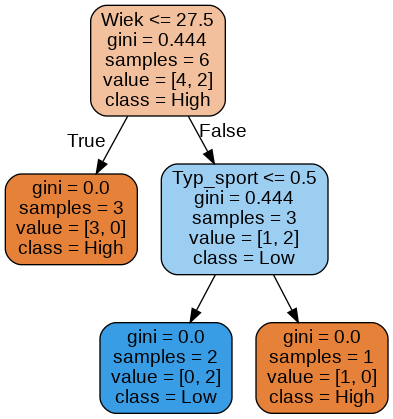

In [ ]:
#print(export_graphviz(clf_train, None))

#Create Dot Data
dot_data = export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['High', 'Low'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

Testujemy jakie jest ryzyko dla samochodu **50, family** (zakodowanego jak one-hot)

In [ ]:
prediction = clf_train.predict([[50,1,0,0]])
prediction

array(['low'], dtype=object)

**zad.1**

**A)**

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pydotplus
from IPython.display import Image 

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('/content/drive/My Drive/DM')

Mounted at /content/drive


In [15]:
data=pd.read_csv('ED_lab_12/tennis.csv')
data

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [16]:
columns_data = pd.get_dummies(data[ ['Outlook','Temperature'] ])
columns_data

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild
0,0,0,1,0,1,0
1,0,0,1,0,1,0
2,1,0,0,0,1,0
3,0,1,0,0,0,1
4,0,1,0,1,0,0
5,0,1,0,1,0,0
6,1,0,0,1,0,0
7,0,0,1,0,0,1
8,0,0,1,1,0,0
9,0,1,0,0,0,1


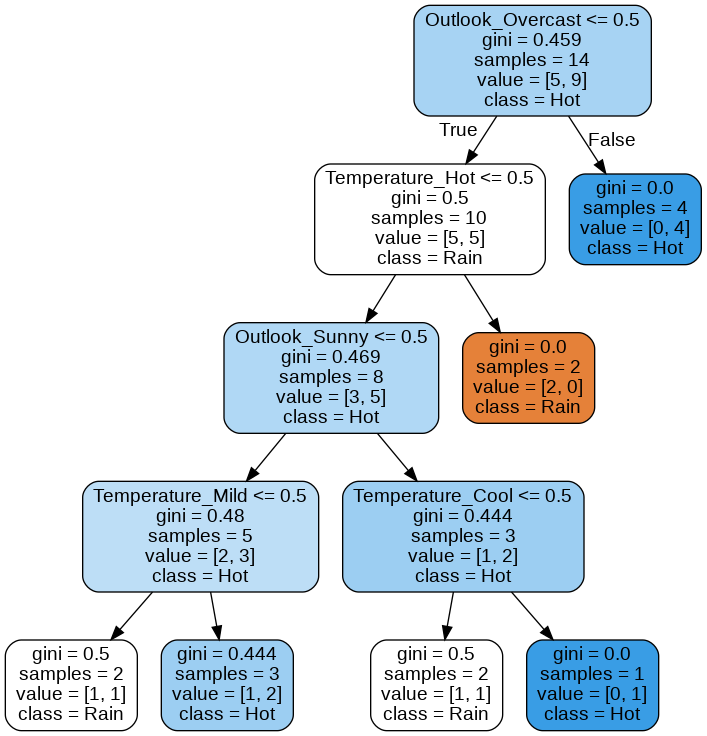

In [17]:
clf = DecisionTreeClassifier()

clf_train = clf.fit(columns_data, data['PlayTennis'])

# Rysujemy drzewo decyzyjne:

#Create Dot Data
dot_data = export_graphviz(clf_train, out_file=None, feature_names=list(columns_data.columns.values), 
                                class_names=['Rain', 'Hot'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

**B)**

In [18]:
columns_data = pd.get_dummies(data)
columns_data

,Day_D1,Day_D10,Day_D11,Day_D12,Day_D13,Day_D14,Day_D2,Day_D3,Day_D4,Day_D5,Day_D6,Day_D7,Day_D8,Day_D9,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,PlayTennis_No,PlayTennis_Yes
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1


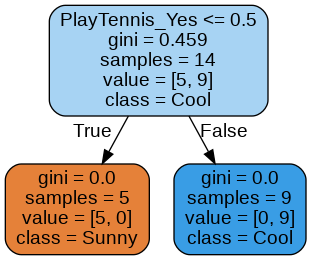

In [19]:
clf = DecisionTreeClassifier()

clf_train = clf.fit(columns_data, data['PlayTennis'])

# Rysujemy drzewo decyzyjne:

#Create Dot Data
dot_data = export_graphviz(clf_train, out_file=None, feature_names=list(columns_data.columns.values), 
                                class_names=['Sunny', 'Cool', 'High', 'Strong'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())